In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensornetwork
from tensornetwork import ncon
net = tensornetwork.TensorNetwork()
sess = tf.InteractiveSession()

# Tipos de tensores especiales: Diagonal, unitario, isometrico







## Tensor Diagonal

![texto alternativo](https://static.wixstatic.com/media/d91e93_7b0202ac5ae343c7ae2bfba6927a51f5~mv2.png/v1/fill/w_750,h_115,al_c,q_90/d91e93_7b0202ac5ae343c7ae2bfba6927a51f5~mv2.webp)

*    **$I$** es tensor identidad, equivalente a delta de kronecker $\delta_{ij}$, representado por una linea

*    **$D$** matriz diagonal con elementos {$\lambda_1,\lambda_2,...$}, representada por un circulo solido (en contraste con matrices no diagonales que son representadas por formas más grandes o de colores)

*    **$Y$** Generalizacion de tensor diagonal

## Tensor Unitario

![texto alternativo](https://static.wixstatic.com/media/d91e93_8c75c8e7077c44af8b7c8ad5fae8b100~mv2.png/v1/fill/w_950,h_245,al_c,q_90/d91e93_8c75c8e7077c44af8b7c8ad5fae8b100~mv2.webp)

*    Una matriz $U$ es unitaria si la contraccion $UU^† = I$

*    Un tensor $U$ es unitario si existe una bipartición de los índices (aquí denotados por la línea punteada) bajo la cual el tensor podría remodelar sus indices para convertirse en una matriz unitaria.

**Nota**:
<br>
*    A menudo dibujamos el conjugado de un tensor con orientación vertical opuesta (y aquí usamos flechas para denotar explícitamente la orientación del tensor para mayor claridad).

*    La forma de un tensor puede usarse convenientemente para indicar su orientación, eliminando la necesidad de usar flechas para este propósito.

## Tensor Isometrico

![texto alternativo](https://static.wixstatic.com/media/d91e93_ff1e21787d914bbba6cb9d5f4c23eb84~mv2.png/v1/fill/w_788,h_218,al_c,q_90/d91e93_ff1e21787d914bbba6cb9d5f4c23eb84~mv2.webp)

Sea $W_{d1d2}$ un tensor y asumiendo $d_1> d_2$, si:

*    $W^† W = I$ por medio de $d_1$
*    $WW^†= P$ por medio de $d_2$, donde $P$ es un proyector (tensor hermitico) con valores propios de 0 y 1.

Entonces W es un tensor isometrico

![texto alternativo](https://static.wixstatic.com/media/d91e93_e822eb72457e494499a4a829ee414e4a~mv2.png/v1/fill/w_800,h_270,al_c,q_90/d91e93_e822eb72457e494499a4a829ee414e4a~mv2.webp)

Ejemplos de tensores isométricos, que se pueden remodelar en matrices isométricas bajo de la partición indicada por las líneas punteadas, y las restricciones que satisfacen.

### Convenciones diagramaticas

*    **tensor unitario** se representará como un rectángulo o trapecio, donde la dimensión más grande indica la partición de los indices bajo los cuales se puede remodelar en una matriz unitaria. 

*    **tensor isometrico** se representa como cuñas que 'apuntan' en la dirección de la dimensión más pequeña (es decir, que genera la identidad cuando se contrae con su transpuesta conjugada a lo largo de la base de la cuña). 

***Nota:*** Estas convenciones permiten indicar la partición de índices bajo los cuales un tensor se vuelve isométrico / unitario solo por su forma, eliminando la necesidad de indicar estas particiones explícitamente. Sin embargo, no todos los investigadores de la red tensorial siguen estas convenciones.

# Descomposicion tensorial

Son importantes para algoritmos de redes tensoriales en donde se aproximan tensores de un rango alto como producto de tensores de rango bajo

## SVD (Descomposición en valores singulares)

Descompone una matriz o un tensor $A$ en un producto de matrices $USV^*$, $A = USV^*$

<img src="https://static.wixstatic.com/media/d91e93_41252d23123a4b2c9304b350b4b641fc~mv2.png/v1/fill/w_943,h_258,al_c,q_90/d91e93_41252d23123a4b2c9304b350b4b641fc~mv2.webp" width="600">

**Propiedades:** Asumimos que $d_1 > d_2$

*    $U$ matriz isometrica $d_1\times d_2$.  
*    $S$ Matriz diagonal $d_2\times d_2$ con elementos no negativos llamados valores singulares y estan arreglados en orden descendente. **Rango de Schimdt** es el numero de valores singulares diferentes de cero.
*    $V$ matriz unitaria $d_2\times d_2$ y $V^†$ es su transpuesta conjugada. 

<br>
new dim = min($\prod$ left edge dim, $\prod$ rigth edge dim)





In [2]:
###### SVD de un tensor con numpy

d = 10; 
A = np.random.rand(d,d,d)

#Remodelar tensor A hacia la matriz A

Am = A.reshape(d**2,d)
Um,Sm,Vh = np.linalg.svd(Am,full_matrices=False)
U = Um.reshape(d,d,d); S = np.diag(Sm)

# verificar resultados

Af = ncon([U,S,Vh],[[-1,-2,1],[1,2],[2,-3]])
dA = tf.norm(Af-A).eval()
print(dA)

###### SVD con la libreria tensornetwork

A = net.add_node(np.random.rand(d,d,d))
B = net.add_node(A.tensor)

#split_node
u_s, s_vh, trun_err1 = net.split_node(A, [A[0],A[1]],[A[2]])

#split_node_full_svd
u, s, vh, trun_err2 = net.split_node_full_svd(B, [B[0],B[1]],[B[2]])

#verificar
print(tf.norm(tf.matmul(u_s.tensor,s_vh.tensor)-A.tensor).eval())
print(tf.norm(ncon([u.tensor,s.tensor,vh.tensor],[[-1,-2,1],[1,2],[2,-3]])-B.tensor).eval())

1.8555394268721767e-14
9.155063297511652e-14
9.088670793218645e-14


**Split_node**

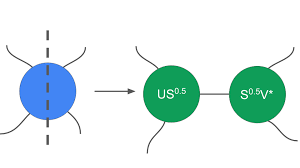

**Split Node Full SVD**

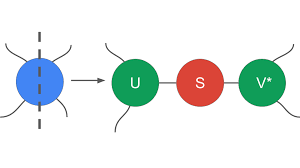


## Descomposicion Espectral

*    Es la factorización de una matriz en una forma canónica, mediante la cual la matriz se representa en términos de sus valores propios y vectores propios. Solo las matrices diagonalizables se pueden factorizar de esta manera. 

*    Es una descomposición particularmente útil para matrices o tensores hermiticos donde deseamos que la descomposición preserve explícitamente el carácter Hermtico. 

*   $H = UDU^†$

<img src="https://static.wixstatic.com/media/d91e93_7ba4a392fded46ff894375ecc072ae3d~mv2.png/v1/fill/w_943,h_248,al_c,q_90/D19.webp" width="600">

*    **izquierda** Descomposicion espectral de matriz hermitica $H$

*    **derecha** Descomposicion espectral de un tensor hermitico $H$.

In [3]:
##### Descomposicion espectral de una matriz con numpy
d = 10; A = np.random.rand(d,d)
H = 0.5*(A + A.T) # matriz simetrica
D,U = np.linalg.eig(H)
# Verifiar
Hf = U @ np.diag(D) @ U.T
print(np.linalg.norm(Hf-H))


##### Descomposicion espectral de un tensor con numpy
d = 2; A = np.random.rand(d,d,d,d)
H = 0.5*(A + A.transpose(2,3,0,1))
D,U = np.linalg.eig(H.reshape(d**2,d**2))
U = U.reshape(d,d,d**2)
# verificar
Hf = ncon([U,np.diag(D),U],
           [[-1,-2,1],[1,2],[-3,-4,2]])
print(np.linalg.norm(Hf.eval()-H))

8.627238717547236e-15
2.1344741451801295e-15


## Descomposicion QR

*    Util para ortogonalizar tensores

*    El costo de computo es menor que la SVD pero tiene menos informacion (no tiene rango de schmidt).

*    $A = QR$, con $Q$ matriz isometrica y $R$ matriz triangular superior

<img src="https://static.wixstatic.com/media/d91e93_1804dce96af64fb0997fb2154085cdfc~mv2.png/v1/fill/w_923,h_225,al_c,q_90/d91e93_1804dce96af64fb0997fb2154085cdfc~mv2.webp" width="600">

*    **izquierda** Descomposicion QR de matriz $A$
*    **derecha** Descomposicion QR de tensor $A$



In [4]:
##### QR de matriz
d1 = 10; d2 = 6
A = np.random.rand(d1,d2)
Q,R = np.linalg.qr(A)
# Verificar
Af = Q @ R
print(np.linalg.norm(Af-A))

##### QR de tensor
d = 10
A = np.random.rand(d,d,d)
Qm,R = np.linalg.qr(A.reshape(d**2,d))
Q = Qm.reshape(d,d,d)
# Verificar
Af = ncon([Q,R],[[-1,-2,1],[1,-3]]);
print(np.linalg.norm(Af.eval()-A))

1.5451157752940125e-15
4.896391607656523e-15


# Norma de Frobenius o de Hilbert-Schmidt para tensores

Una norma tensorial que es particularmente útil


<img src="https://static.wixstatic.com/media/d91e93_5cc7d2d9a78e42289295eb561e4fad19~mv2.png/v1/fill/w_406,h_113,al_c,q_90/d91e93_5cc7d2d9a78e42289295eb561e4fad19~mv2.webp" width="300">

La generalizacion para tensores con orden $> 2$ es

<img src="https://static.wixstatic.com/media/d91e93_4fb8eb3d3eed467a9be07c0f9bda030c~mv2.png/v1/fill/w_864,h_163,al_c,q_90/d91e93_4fb8eb3d3eed467a9be07c0f9bda030c~mv2.webp" width="650">

In [5]:
##### Ejemplo Norma de Frobenius
d = 10; A = np.random.rand(10,10,10,10,10)
# norma de frobenius
cvec = [k+1 for k in range(np.ndim(A))]
frobA0 = np.sqrt(ncon([A,np.conj(A)],[cvec,cvec]).eval())
# forma equivalente 
frobA1 = np.sqrt(sum(A.flatten()**2))
# otra forma equivalente de la norma
frobA2 = np.linalg.norm(A)

print(frobA0)
print(frobA1)
print(frobA2)

182.41840952429325
182.41840952429246
182.41840952429334


Una propiedad útil de la norma de Frobenius es que tiene una expresión simple en términos de los valores singulares de un tensor.

<img src="https://static.wixstatic.com/media/d91e93_1c0ff317ed0c44149bc47219886c1e88~mv2.png/v1/fill/w_968,h_268,al_c,q_90/d91e93_1c0ff317ed0c44149bc47219886c1e88~mv2.webp" width="650">

<br>

<img src="https://static.wixstatic.com/media/d91e93_ed8a2bdda31f4f1cbe4a83fde77954b4~mv2.png/v1/fill/w_236,h_113,al_c,q_90/d91e93_ed8a2bdda31f4f1cbe4a83fde77954b4~mv2.webp" width="150">



## Error de aproximacion

Supongamos que deseamos aproximar un tensor $A$ con otro tensor $B$ de igual tamaño. Es útil definir el error de aproximación $\varepsilon$ como

<img src="https://static.wixstatic.com/media/d91e93_5d449ef7d13845d1802956ec16e73a50~mv2.png/v1/fill/w_881,h_80,al_c,q_90/D11.webp" width="650">



## Aproximacion tensorial, rango de schmidt y SVD

*    Dado algun tensor $A$ y alguna biparticion de sus indices tal que $A$ puede expresarse como el producto tensorial $A=B. C$.
<br>
<b>Rango de descomposicion o rango de Schimdt (r)</b> = min(dim $B$, dim $C$)

*  Una aplicación útil de SVD es encontrar la aproximación óptima del rango de schmidt. Dado un tensor $A$ que tiene un rango de descomposición $r$ con respecto a alguna partición específica de sus índices, supongamos que deseamos encontrar un tensor de tamaño equivalente B de rango de schmidt reducido, $\chi <r$, que se aproxime mejor a $A$ (es decir, que minimice la diferencia de la norma de Frobenius $\varepsilon$).
<br>
La factorización que minimiza el error de truncamiento $\varepsilon$ se puede obtener directamente de la SVD de $A$ simplemente 'recortando' los valores singulares más pequeños y truncando las matrices $U$ y $V$. 

<img src="https://static.wixstatic.com/media/d91e93_c6bd36879e6948348c844eb1ae3923dc~mv2.png/v1/fill/w_999,h_198,al_c,q_90/D15.webp" width="650">




In [6]:
##### SVD numpy
d = 10; A = np.random.rand(d,d,d,d,d)
Um,S,Vhm = np.linalg.svd(A.reshape(d**3,d**2),full_matrices=False)
U = Um.reshape(d,d,d,d**2)
Vh = Vhm.reshape(d**2,d,d)
##### truncamineto
chi = 90;
Utilda = U[:,:,:,:chi]
Stilda = np.diag(S[:chi])
Vhtilda = Vh[:chi,:,:]
B = ncon([Utilda,Stilda,Vhtilda],[[-1,-2,-3,1],[1,2],[2,-4,-5]])
### comparar
print("epsilonAB = ",np.linalg.norm(A-B.eval()) / np.linalg.norm(A))


##### SVD tensornetwork
B = net.add_node(A)
u, s, vh, trun_err2 = net.split_node_full_svd(B, [B[0],B[1],B[2]],[B[3],B[4]],chi)

## Comparar
print("epsilonAB = ",(tf.norm(ncon([u.tensor,s.tensor,vh.tensor],[[-1,-2,-3,1],[1,2],[2,-4,-5]])-B.tensor)/tf.norm(B.tensor)).eval())

epsilonAB =  0.11575719498204869
epsilonAB =  0.11575719498204873


el error de truncamiento $\varepsilon$ de la aproximación óptima de rango de schmidt reducido $\chi$ es (suponiendo que el tensor inicial se ha normalizado correctamente $|| A||=1 $):

<img src="https://static.wixstatic.com/media/d91e93_a69a9a23929341b58164d8289b8bd112~mv2.png/v1/fill/w_255,h_128,al_c,q_90/D20.webp" width="150">

## Rango de Schmidt efectivo

el rango efectivo con una precision $\Delta$, $r (\Delta)$, es el número de valores singulares mayores o iguales a $\Delta$. En muchos casos (particularmente si el espectro de valores singulares está decayendo bruscamente), al truncar un tensor con $r (\Delta)$ el error es $\varepsilon \approx \Delta$. 

In [7]:
##### Rango efectivo

"""generamos una matriz A aleatoria y calculamos el rango efectivo con precisión 
Δ = 1e-2, que se evalúa como r (Δ = 1e-2) = 359. Luego calculamos el error de 
truncamiento de la aproximación de rango restringida, que se encuentra como 
ε ≈ 6e-2"""

# generar matriz aleatoria numpy
d = 500;
A = np.random.rand(d,d)
A = A / np.linalg.norm(A) #normalizamos

# calcular el rango efectivo de una precision deltaval
deltaval = 1e-2
Um, Sm, Vhm = np.linalg.svd(A)
r_delta = sum(Sm > deltaval)
print("r_delta = ",r_delta,"; eps_err = ",np.sqrt(sum(Sm[r_delta:]**2)))
# verificamos si es el mismo error de aprox
Vhtilda = Vhm[:r_delta,:]
Stilda = np.diag(Sm[:r_delta])
Utilda = Um[:,:r_delta]
B = ncon([Utilda,Stilda,Vhtilda],[[-1,1],[1,2],[2,-2]])
### error aprox
print("epsilonAB_numpy = ",np.linalg.norm(A-B.eval()) / np.linalg.norm(A))


###Ahora utilicemos tensornetwork
B = net.add_node(A)
u, s, vh, trun_err1 = net.split_node_full_svd(B, [B[0]],[B[1]],None,deltaval)
### error aprox
print("epsilonAB_net = ",(tf.norm(ncon([u.tensor,s.tensor,vh.tensor],[[-1,1],[1,2],[2,-2]])-B.tensor)/tf.norm(B.tensor)).eval())

r_delta =  359 ; eps_err =  0.06811277361577432
epsilonAB_numpy =  0.06811277361577436
epsilonAB_net =  0.009851811542897753


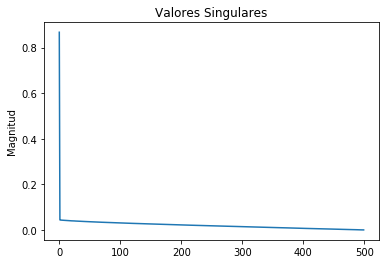

In [8]:
plt.title('Valores Singulares')
plt.ylabel('Magnitud')
plt.plot(Sm)
plt.show()